<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/Theboys/Theboys_Assignment7_Vaex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Theboys - Assignment 7 Vaex
1. Pang Chern Hong | MCS231006
2. Nian Cong    | MCS231007
3. Wu Jiaming    | MCS221033
4. Liu Kaiyuan   | MCS231020


Dataset link:https://www.kaggle.com/datasets/forgemaster/steam-reviews-dataset?select=reviews-1230-2345.csv

##Dataset Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d forgemaster/steam-reviews-dataset
! unzip steam-reviews-dataset

100% 1.93G/1.93G [00:15<00:00, 176MB/s]
100% 1.93G/1.93G [00:15<00:00, 135MB/s]
Archive:  steam-reviews-dataset.zip
  inflating: reviews-1-115.csv       
  inflating: reviews-11265-13495.csv  
  inflating: reviews-115-1230.csv    
  inflating: reviews-1230-2345.csv   
  inflating: reviews-13495-13500.csv  
  inflating: reviews-13500-13537.csv  
  inflating: reviews-13537-27075.csv  
  inflating: reviews-2345-4575.csv   
  inflating: reviews-4575-6805.csv   
  inflating: reviews-6805-9035.csv   
  inflating: reviews-9035-11265.csv  


##Install vaex

In [ ]:
# !pip install vaex
%%capture
%%bash
python -m pip install -U pip
python -m pip install vaex-core
python -m pip install vaex-hdf5
python -m pip install -U ipython ipykernel

In [ ]:
!pip install vaex-viz # For visualization related functionality

In [ ]:
import vaex
import numpy as np
import pandas as pd
import warnings
import time
import gc
import os

Read CSV

In [ ]:
%%time

# reading the companies_sorted csv file
df = vaex.read_csv("/content/reviews-1230-2345.csv")

CPU times: user 13.6 s, sys: 1.32 s, total: 14.9 s
Wall time: 17.1 s


In [ ]:
%%time

df.info()

column,type,unit,description,expression
steamid,int64,,,
appid,int64,,,
voted_up,bool,,,
votes_up,int64,,,
votes_funny,int64,,,
weighted_vote_score,float64,,,
playtime_forever,int64,,,
playtime_at_review,int64,,,
num_games_owned,int64,,,
num_reviews,int64,,,


CPU times: user 224 ms, sys: 41.8 ms, total: 266 ms
Wall time: 357 ms


In [ ]:
%%time

df.describe()

/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py:1167: RuntimeWarning: invalid value encountered in sqrt
  return var**0.5


CPU times: user 2.15 s, sys: 798 ms, total: 2.95 s
Wall time: 2.64 s


,steamid,appid,voted_up,votes_up,votes_funny,weighted_vote_score,playtime_forever,playtime_at_review,num_games_owned,num_reviews,review,unix_timestamp_created,unix_timestamp_updated
data_type,int64,int64,bool,int64,int64,float64,int64,int64,int64,int64,string,int64,int64
count,3067681,3067681,3067681,3067681,3067681,3067681,3067681,3067681,3067681,3067681,3063225,3067681,3067681
NA,0,0,0,0,0,0,0,0,0,0,4456,0,0
mean,452277410334.7473,235846.87806522255,0.8712675796472971,2.323969148030711,145608.02008455247,0.19427018676836813,13569.468450272372,7142.564394733351,215.82679392022834,17.572880948182032,--,1501721447.9604461,1506026874.0401723
std,NaN,16749.332998,0.334904,45.555347,25007142.600051,0.249614,36276.728725,21947.683378,369.71875,52.994483,--,77237356.389924,77153731.533021
min,76561197960265776,204100,False,0,0,0.0,0,0,0,1,--,1328035110,1328037431
max,76561199163885680,266190,True,28216,4294967295,0.979833,3276720,2580531,24013,5236,--,1619082535,1619082535


In [ ]:
%%time
len(df)

CPU times: user 14 µs, sys: 2 µs, total: 16 µs
Wall time: 19.3 µs


3067681

**Calculate the mean of each numeric column**

In [ ]:
%%time

int_float_columns = [column for column, dtype in df.dtypes.items() if dtype in (int, float)]

# Calculate the mean for columns of type int and float
mean_values = {}
for column in int_float_columns:
    mean_values[column] = df[column].mean()
    print(f"Mean value of '{column}': {mean_values[column]}")

Mean value of 'steamid': 452277410334.7473
Mean value of 'appid': 235846.87806522255
Mean value of 'votes_up': 2.323969148030711
Mean value of 'votes_funny': 145608.02008455247
Mean value of 'weighted_vote_score': 0.19427018676836813
Mean value of 'playtime_forever': 13569.468450272372
Mean value of 'playtime_at_review': 7142.564394733351
Mean value of 'num_games_owned': 215.82679392022834
Mean value of 'num_reviews': 17.572880948182032
Mean value of 'unix_timestamp_created': 1501721447.9604461
Mean value of 'unix_timestamp_updated': 1506026874.0401723
CPU times: user 125 ms, sys: 2.98 ms, total: 128 ms
Wall time: 93.7 ms


**Calculate the Standard Deviation of each numeric column**

In [ ]:
%%time

# Calculate the standard deviation for columns of type int and float
std_values = {}
for column in int_float_columns:
    std_values[column] = df[column].std()
    print(f"Mean value of '{column}': {std_values[column]}")

Mean value of 'steamid': nan


/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py:1167: RuntimeWarning: invalid value encountered in sqrt
  return var**0.5


Mean value of 'appid': 16749.332998447302
Mean value of 'votes_up': 45.555346740356484
Mean value of 'votes_funny': 25007142.60005118
Mean value of 'weighted_vote_score': 0.24961406320002483
Mean value of 'playtime_forever': 36276.72872535251
Mean value of 'playtime_at_review': 21947.68337795927
Mean value of 'num_games_owned': 369.7187499555948
Mean value of 'num_reviews': 52.994482912246625
Mean value of 'unix_timestamp_created': 77237356.38999149
Mean value of 'unix_timestamp_updated': 77153731.5329942
CPU times: user 1.25 s, sys: 8.01 ms, total: 1.26 s
Wall time: 811 ms


**Filtering data of playtime with more than 1000 hours**

In [ ]:
%%time

Filter_column = df[df['playtime_at_review'] > 1000]
# Filter_column_result = Filter_column.compute()
print(Filter_column)
print(f"\nPlaytime with more than 1000 hours: {len(Filter_column)}")

#          steamid            appid    voted_up    votes_up    votes_funny    weighted_vote_score    playtime_forever    playtime_at_review    num_games_owned    num_reviews    review                                               unix_timestamp_created    unix_timestamp_updated
0          76561199012934585  204100   True        0           0              0.0                    1671                1660                  37                 10             'A masterpiece that is extremely underrated. Thi...  1619063926                1619063926
1          76561198123483551  204100   True        0           0              0.0                    3143                3143                  83                 14             Amazing!!!                                           1619062713                1619062713
2          76561197972464391  204100   True        0           0              0.0                    1012                1006                  191                20             Classic Pa

**Group by**

In [ ]:
%%time
df_group=df.groupby(by='appid').agg({'playtime_at_review':['mean','std'],'num_games_owned':['mean','std']})
df_group

CPU times: user 322 ms, sys: 72 µs, total: 322 ms
Wall time: 222 ms


#,appid,playtime_at_review_mean,playtime_at_review_std,num_games_owned_mean,num_games_owned_std
0,226860,6568.878707539354,14789.421938739086,175.24821872410936,271.8999249865296
1,230840,158.00404858299595,297.1653188113592,451.7449392712551,674.225679522688
2,231140,1685.3617021276596,4248.672742316032,222.75177304964538,272.81315940339977
3,231330,663.2845010615712,725.8895470786753,431.1804670912951,528.1226206701207
4,231720,93.1063829787234,110.8885263605145,834.1063829787234,1105.6521178489816
...,...,...,...,...,...
886,264060,1054.3461538461538,945.6709031690633,485.3269230769231,350.6967088280702
887,264730,310.61641221374043,1576.235106351206,524.4007633587786,816.3379873665918
888,265550,1071.7714589423333,1581.2541675353075,287.57879351581187,367.20530599288503
889,265770,22.0,0.0,71.0,0.0


In [ ]:
%%time
# Number of reviews for different games
df.groupby(df.appid,agg='count')

CPU times: user 111 ms, sys: 2.11 ms, total: 113 ms
Wall time: 76.6 ms


#,appid,count
0,207080,541
1,207230,23
2,207930,170
3,208730,711
4,209190,304
...,...,...
886,264060,52
887,264730,524
888,265550,3763
889,265770,1


##EDA

**barplot:Number of game reviews**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
%%time

reviews_count = df.groupby(df.appid,agg='count')
result_count = reviews_count.sort("count",ascending=False).head(10).to_pandas_df()
result_count

CPU times: user 115 ms, sys: 3.74 ms, total: 119 ms
Wall time: 89.6 ms


,appid,count
0,252490,251890
1,252950,193048
2,218620,116898
3,221100,113205
4,264710,89936
5,242760,86817
6,227300,63074
7,251570,60458
8,250900,57414
9,244850,50868


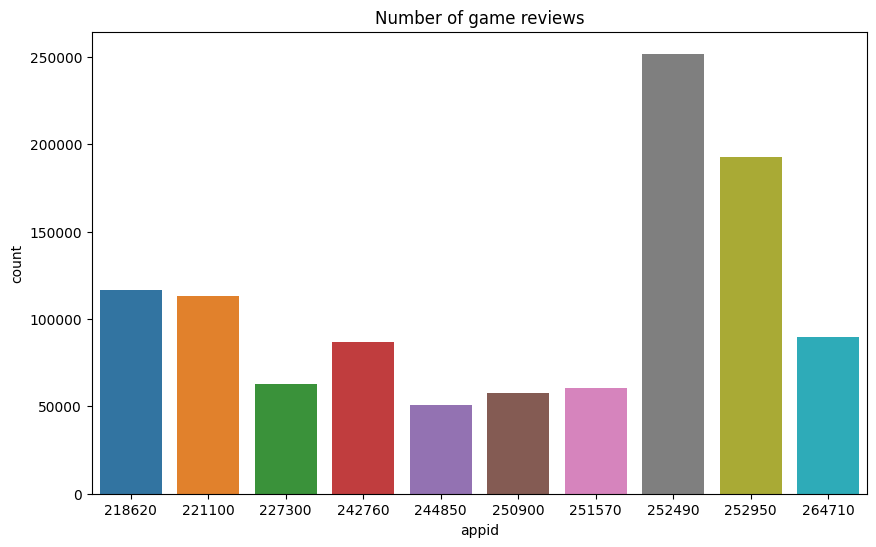

CPU times: user 202 ms, sys: 93.7 ms, total: 296 ms
Wall time: 198 ms


In [ ]:
%%time
plt.figure(figsize=(10,6))
sns.barplot(x='appid', y='count',data=result_count).set(title="Number of game reviews")
plt.show()

**Boxplot:Positive rating**

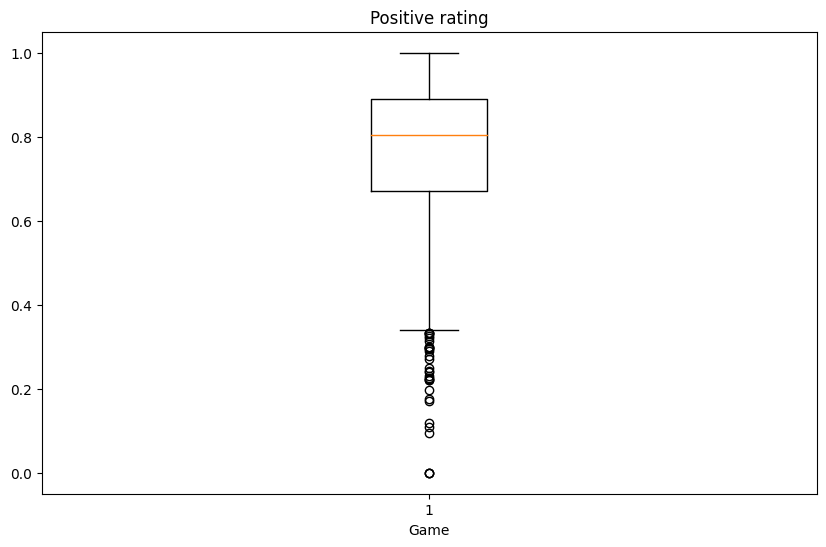

CPU times: user 275 ms, sys: 101 ms, total: 376 ms
Wall time: 223 ms


In [ ]:
%%time

proportion_Goodreviews = df.groupby(df.appid, agg={'proportion_true': vaex.agg.mean(df.voted_up)}).to_pandas_df()
plt.figure(figsize=(10,6))
plt.boxplot(proportion_Goodreviews['proportion_true'])
plt.title('Positive rating')
plt.xlabel('Game')
plt.show()

**Scatterplot:Distribution map of positive rating**

Text(0.5, 0, 'App id')

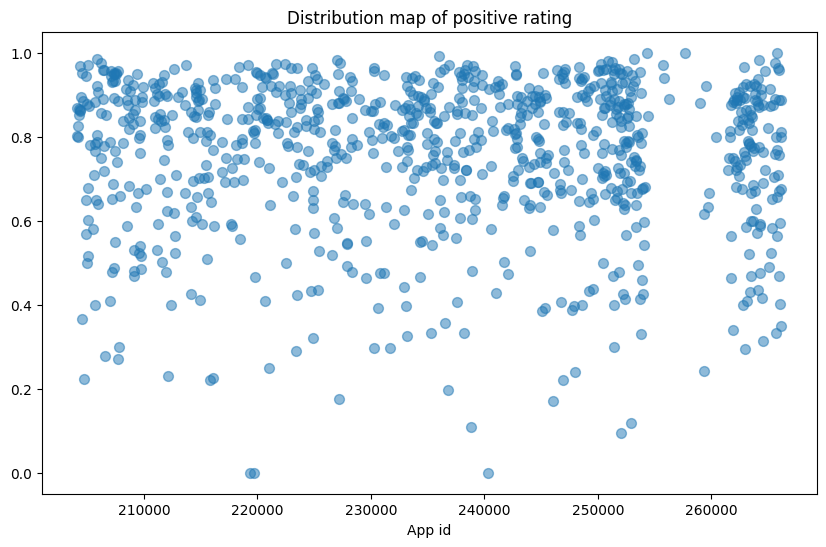

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(proportion_Goodreviews.appid, proportion_Goodreviews['proportion_true'], s=50, alpha=0.5)
plt.title('Distribution map of positive rating')
plt.xlabel('App id')

**Relationship between Positive rating and playtime**

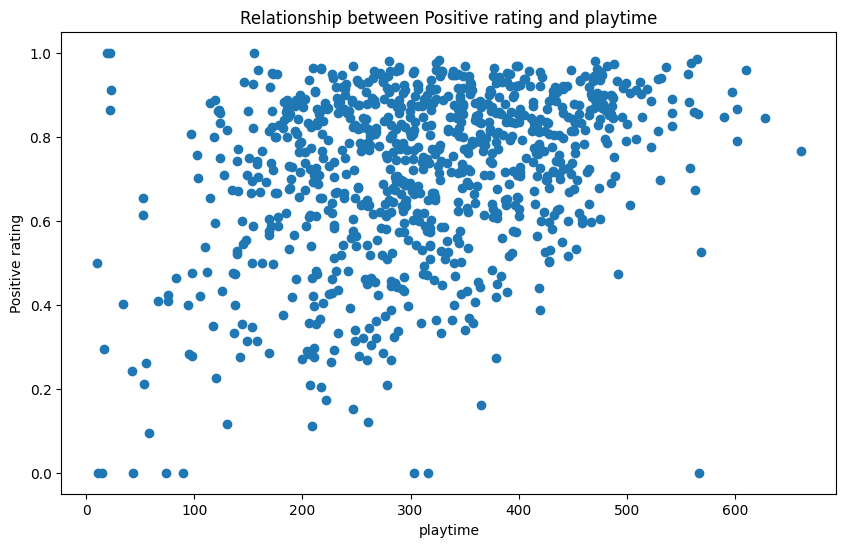

CPU times: user 334 ms, sys: 42.8 ms, total: 377 ms
Wall time: 459 ms


In [ ]:
%%time

# Eliminate data with playtime that is too large or too small(> 1000 && < 2)
filtered_df = df[(df.playtime_at_review < 1000) & (df.playtime_at_review > 2)]

# Group data by appid,get the mean of voted_up and playtime_at_review
averages_by_appid = filtered_df.groupby(filtered_df.appid, agg={'proportion_true': vaex.agg.mean(filtered_df.voted_up),'playtime': vaex.agg.mean(filtered_df.playtime_at_review)})

x = averages_by_appid['playtime'].values
y = averages_by_appid['proportion_true'].values

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title('Relationship between Positive rating and playtime')
plt.xlabel('playtime')
plt.ylabel('Positive rating')
plt.show()

###Pros and Cons of using Vaex

**Pros**:

1. **Memory Efficiency**: Vaex loads subset of entire dataset multiple times and that enable it to handle the dataset which larger than the RAM, in the same way it also process and read the data in chunks.

2. **Concurrency**: Like Dask, Vaex also use parallel processing to better utilize the multi-core system.

3. **Integration with Dask**: Vaex can integrate with Dask, another parallel computing library of Python.

4. **Support of expression**: Vaex enable the use of expression for the calculation which simplify the process of creating new columns without a complicated loop.

**Cons**

1. **Community**: The community of Vaex is smaller compared to Pandas, that means it is harder to find a good resources or documentation and the solutions when we encounter some problems.

2. **Limited Functionality**: Vaex is excellent to do the basic data manipulation and analysis, but it do not possess some more advanced features and functions of Pandas.

3. **Learning Curve**: Users need to master the syntax and approaches of Vaex, which might cause a learning curve for users who are new to the Vaex like a traditional Pandas user.

###Conclusion

In summary, Vaex is an amazing tool to handle the big dataset particularly when it needed to handle some categorical and numerical data. While we should be aware of the limitation of Vaex, wisely select the tools we can use such as Dask or Pandas depending on the taks given.